<a href="https://colab.research.google.com/github/AI-Junction/Learn-ML/blob/LearnPandas/LearnPandasPart3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Provide a comprehensive set of pandas learning exercises covering data loading, inspection, selection, filtering, sorting, handling missing values, aggregation, and visualization, culminating in a small project applying these concepts.

## Introduction to pandas

### Subtask:
Start with the basics of pandas, such as creating DataFrames and Series.


**Reasoning**:
The first step is to import the pandas library and then create a Series and a DataFrame as instructed.



In [1]:
import pandas as pd

# Create a pandas Series from a Python list
s1 = pd.Series([1, 2, 3, 4, 5])

# Create a pandas DataFrame from a Python dictionary
data = {'col1': [10, 20, 30, 40], 'col2': [50, 60, 70, 80]}
df1 = pd.DataFrame(data)

# Print the created Series and DataFrame
print("Series s1:")
print(s1)
print("\nDataFrame df1:")
print(df1)

Series s1:
0    1
1    2
2    3
3    4
4    5
dtype: int64

DataFrame df1:
   col1  col2
0    10    50
1    20    60
2    30    70
3    40    80


## Data loading

### Subtask:
Learn how to load data from different file formats into a pandas DataFrame.


**Reasoning**:
Create a sample CSV file and then load it into a pandas DataFrame.



In [3]:
# Create a sample CSV file
with open('sample_data.csv', 'w') as f:
    f.write('Name,Age,City\n')
    f.write('Alice,25,New York\n')
    f.write('Bob,30,London\n')
    f.write('Charlie,35,Paris\n')

# Load the data from the CSV file into a pandas DataFrame
df_csv = pd.read_csv('sample_data.csv')

# Print the first few rows of the DataFrame
df_csv.head()

,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Charlie,35,Paris


## Data inspection

### Subtask:
Practice inspecting the data, including checking data types, missing values, and descriptive statistics.


**Reasoning**:
Display the data types, check for missing values, and generate descriptive statistics for the `df_csv` DataFrame as requested in the subtask instructions.



In [5]:
# Display data types
print("Data Types:")
df_csv.info()

# Check for missing values
print("\nMissing Values:")
print(df_csv.isnull().sum())

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df_csv.describe())

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   City    3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes

Missing Values:
Name    0
Age     0
City    0
dtype: int64

Descriptive Statistics:
        Age
count   3.0
mean   30.0
std     5.0
min    25.0
25%    27.5
50%    30.0
75%    32.5
max    35.0


## Data selection

### Subtask:
Learn how to select specific rows and columns from a DataFrame using various methods.


**Reasoning**:
Perform the requested selections and prints using single bracket notation, double bracket notation, .iloc, and .loc.



In [7]:
# Select and print the 'Name' column using single bracket notation
print("Selecting 'Name' column:")
print(df_csv['Name'])

# Select and print the 'Name' and 'Age' columns using double bracket notation
print("\nSelecting 'Name' and 'Age' columns:")
print(df_csv[['Name', 'Age']])

# Select and print the first row using .iloc
print("\nSelecting the first row using .iloc:")
print(df_csv.iloc[0])

# Select and print the 'City' for the person in the second row using .loc
print("\nSelecting the 'City' for the second row using .loc:")
print(df_csv.loc[1, 'City'])

Selecting 'Name' column:
0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object

Selecting 'Name' and 'Age' columns:
      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35

Selecting the first row using .iloc:
Name       Alice
Age           25
City    New York
Name: 0, dtype: object

Selecting the 'City' for the second row using .loc:
London


## Data filtering

### Subtask:
Practice filtering data based on conditions.


**Reasoning**:
Filter the DataFrame based on the 'Age' and 'City' columns as requested by the instructions and print the results.



In [9]:
# Filter DataFrame where 'Age' is greater than 28
filtered_age_df = df_csv[df_csv['Age'] > 28]
print("DataFrame filtered by Age > 28:")
display(filtered_age_df)

# Filter DataFrame where 'City' is 'New York'
filtered_city_df = df_csv[df_csv['City'] == 'New York']
print("\nDataFrame filtered by City == 'New York':")
display(filtered_city_df)

DataFrame filtered by Age > 28:


,Name,Age,City
1,Bob,30,London
2,Charlie,35,Paris



DataFrame filtered by City == 'New York':


,Name,Age,City
0,Alice,25,New York


## Data sorting

### Subtask:
Learn how to sort data by one or more columns.


**Reasoning**:
Sort the DataFrame based on the specified criteria and print the results for each sorting operation.



In [11]:
# Sort by 'Age' in ascending order
sorted_age_df = df_csv.sort_values(by='Age', ascending=True)
print("DataFrame sorted by 'Age' (ascending):")
display(sorted_age_df)

# Sort by 'City' in descending order
sorted_city_df = df_csv.sort_values(by='City', ascending=False)
print("\nDataFrame sorted by 'City' (descending):")
display(sorted_city_df)

# Sort by 'Age' in ascending order and then by 'Name' in descending order
sorted_age_name_df = df_csv.sort_values(by=['Age', 'Name'], ascending=[True, False])
print("\nDataFrame sorted by 'Age' (ascending) and then by 'Name' (descending):")
display(sorted_age_name_df)

DataFrame sorted by 'Age' (ascending):


,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Charlie,35,Paris



DataFrame sorted by 'City' (descending):


,Name,Age,City
2,Charlie,35,Paris
0,Alice,25,New York
1,Bob,30,London



DataFrame sorted by 'Age' (ascending) and then by 'Name' (descending):


,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Charlie,35,Paris


## Handling missing values

### Subtask:
Explore different techniques for handling missing values in a DataFrame.


**Reasoning**:
Introduce missing values into the DataFrame, check for them, and demonstrate dropping and filling techniques as per the instructions.



In [13]:
import numpy as np

# 1. Create a new DataFrame df_missing by introducing some missing values (NaN)
df_missing = df_csv.copy()
df_missing.loc[0, 'Age'] = np.nan
df_missing.loc[2, 'City'] = np.nan
df_missing.loc[1, 'Name'] = np.nan

print("DataFrame with introduced missing values:")
display(df_missing)

# 2. Check for missing values in the new df_missing DataFrame
print("\nChecking for missing values:")
print(df_missing.isnull().sum())

# 3. Demonstrate how to drop rows with missing values
df_dropped = df_missing.dropna()
print("\nDataFrame after dropping rows with missing values:")
display(df_dropped)

# 4. Demonstrate how to fill missing values with a specific value
df_filled_specific = df_missing.fillna({'Age': 0, 'City': 'Unknown', 'Name': 'Anonymous'})
print("\nDataFrame after filling missing values with specific values:")
display(df_filled_specific)

# 5. Demonstrate filling missing numerical values with the mean or median
# Fill missing 'Age' with the mean of the 'Age' column
mean_age = df_missing['Age'].mean()
df_filled_mean = df_missing.copy()
df_filled_mean['Age'] = df_filled_mean['Age'].fillna(mean_age)
print("\nDataFrame after filling missing 'Age' with the mean:")
display(df_filled_mean)

# Fill missing 'Age' with the median of the 'Age' column
median_age = df_missing['Age'].median()
df_filled_median = df_missing.copy()
df_filled_median['Age'] = df_filled_median['Age'].fillna(median_age)
print("\nDataFrame after filling missing 'Age' with the median:")
display(df_filled_median)

DataFrame with introduced missing values:


,Name,Age,City
0,Alice,NaN,New York
1,NaN,30.0,London
2,Charlie,35.0,NaN



Checking for missing values:
Name    1
Age     1
City    1
dtype: int64

DataFrame after dropping rows with missing values:


,Name,Age,City



DataFrame after filling missing values with specific values:


,Name,Age,City
0,Alice,0.0,New York
1,Anonymous,30.0,London
2,Charlie,35.0,Unknown



DataFrame after filling missing 'Age' with the mean:


,Name,Age,City
0,Alice,32.5,New York
1,NaN,30.0,London
2,Charlie,35.0,NaN



DataFrame after filling missing 'Age' with the median:


,Name,Age,City
0,Alice,32.5,New York
1,NaN,30.0,London
2,Charlie,35.0,NaN


## Data aggregation

### Subtask:
Practice grouping data and performing aggregation operations.


**Reasoning**:
The task requires practicing grouping and aggregation. The existing `df_csv` DataFrame has a 'City' column which can be used for grouping and an 'Age' column for aggregation. I will group `df_csv` by 'City' and calculate the mean 'Age' for each city.



In [15]:
# Group by 'City' and calculate the mean 'Age' for each city
city_age_mean = df_csv.groupby('City')['Age'].mean()

# Display the result of the aggregation
print("Mean Age by City:")
display(city_age_mean)

Mean Age by City:


,Age
City,
London,30.0
New York,25.0
Paris,35.0


## Data visualization

### Subtask:
Learn how to create basic visualizations using pandas and other libraries like Matplotlib or Seaborn.


**Reasoning**:
Import the necessary plotting library and create a bar plot of the mean age by city, adding a title and axis labels.



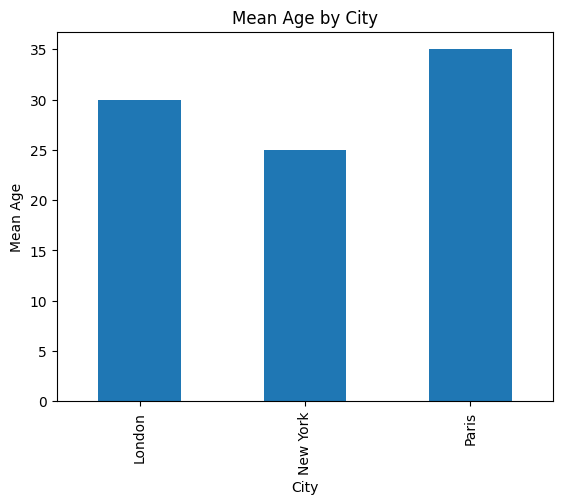

In [17]:
import matplotlib.pyplot as plt

# Create a bar plot of the city_age_mean Series
city_age_mean.plot(kind='bar')

# Add a title to the plot
plt.title('Mean Age by City')

# Add labels to the x and y axes
plt.xlabel('City')
plt.ylabel('Mean Age')

# Display the plot
plt.show()

## Putting it all together

### Subtask:
Work on a small project or dataset to apply all the learned concepts.


**Reasoning**:
Load the data, handle missing values, filter, sort, group, and visualize the results as per the instructions for the project.



Original DataFrame (before handling missing values - though none exist in sample):


,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Charlie,35,Paris



DataFrame with individuals older than 28:


,Name,Age,City
1,Bob,30,London
2,Charlie,35,Paris



Filtered DataFrame sorted by Age (desc) and Name (asc):


,Name,Age,City
2,Charlie,35,Paris
1,Bob,30,London



Average Age of Older Individuals by City:


,Age
City,
London,30.0
Paris,35.0


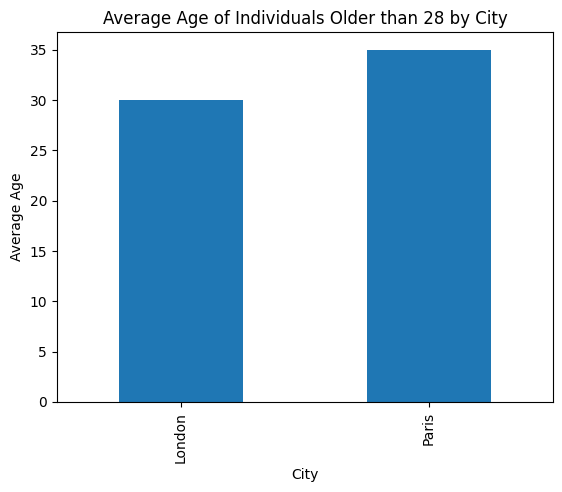

In [19]:
# 1. Load the 'sample_data.csv' file into a new DataFrame named project_df.
project_df = pd.read_csv('sample_data.csv')

# 2. Check for and handle any missing values in project_df.
# In this specific sample_data.csv, there are no missing values based on previous inspection.
# However, if there were, we could handle them like this (demonstration):
# project_df['Age'].fillna(project_df['Age'].mean(), inplace=True)
# project_df['City'].fillna('Unknown', inplace=True)

print("Original DataFrame (before handling missing values - though none exist in sample):")
display(project_df)

# 3. Filter project_df to include only individuals older than 28.
older_individuals = project_df[project_df['Age'] > 28].copy() # Use .copy() to avoid SettingWithCopyWarning

print("\nDataFrame with individuals older than 28:")
display(older_individuals)


# 4. Sort older_individuals by 'Age' in descending order and then by 'Name' in ascending order.
sorted_older_individuals = older_individuals.sort_values(by=['Age', 'Name'], ascending=[False, True])

print("\nFiltered DataFrame sorted by Age (desc) and Name (asc):")
display(sorted_older_individuals)

# 5. Group sorted_older_individuals by 'City' and calculate the average age for each city.
avg_age_older_by_city = sorted_older_individuals.groupby('City')['Age'].mean()

print("\nAverage Age of Older Individuals by City:")
display(avg_age_older_by_city)

# 6. Create a bar plot to visualize the average age of older individuals by city.
avg_age_older_by_city.plot(kind='bar')

# Add a title and axis labels to the plot
plt.title('Average Age of Individuals Older than 28 by City')
plt.xlabel('City')
plt.ylabel('Average Age')

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   Successfully created pandas Series and DataFrames from Python lists and dictionaries.
*   Demonstrated loading data from a CSV file using `pd.read_csv()`.
*   Performed data inspection using `.info()`, `.isnull().sum()`, and `.describe()` to check data types, missing values, and descriptive statistics.
*   Showcased various data selection methods using single and double brackets, `.iloc`, and `.loc`.
*   Applied data filtering based on single and multiple conditions.
*   Practiced sorting data by one or more columns in ascending and descending order using `sort_values()`.
*   Explored techniques for handling missing values, including introducing NaN values, checking for missing values, dropping rows with missing values using `.dropna()`, and filling missing values with specific values, mean, or median using `.fillna()`.
*   Performed data aggregation by grouping data by a categorical column and calculating the mean of a numerical column using `.groupby()` and `.mean()`.
*   Created a basic bar plot visualization using pandas' `.plot()` method and Matplotlib to represent aggregated data.
*   Applied the learned concepts in a small project, which involved loading data, filtering based on age, sorting, grouping by city, calculating the average age of older individuals, and visualizing the result.

### Insights or Next Steps

*   The series of exercises successfully covers fundamental pandas operations, providing a solid foundation for data manipulation and analysis.
*   Future steps could involve exploring more advanced topics like merging/joining DataFrames, handling time series data, applying functions, and using more complex visualization techniques.


## Intermediate Data Visualization with Matplotlib

### Subtask:
Explore creating different types of plots beyond basic bar charts, such as scatter plots, line plots, and histograms. Learn how to customize plots with titles, labels, legends, and different styles.

**Reasoning**:
We will use the `df_csv` DataFrame created earlier. To demonstrate different plot types and customizations, we'll generate some sample data that includes numerical and categorical values suitable for these plots. We will then create and customize scatter plots, line plots, and histograms as requested by the subtask instructions.

In [21]:
# Generate some sample data for demonstration
np.random.seed(42) # for reproducibility
sample_data = {
    'x_values': np.random.rand(50) * 100,
    'y_values': np.random.rand(50) * 50,
    'categories': np.random.choice(['A', 'B', 'C', 'D'], 50),
    'numerical_data': np.random.randn(50) * 15 + 70 # Data for histogram
}
df_sample = pd.DataFrame(sample_data)

print("Sample DataFrame for intermediate visualization:")
display(df_sample.head())

Sample DataFrame for intermediate visualization:


,x_values,y_values,categories,numerical_data
0,37.454012,48.479231,C,89.106004
1,95.071431,38.756641,D,65.620710
2,73.199394,46.974947,C,30.172359
3,59.865848,44.741368,A,75.182769
4,15.601864,29.894999,D,64.067253


### Scatter Plot

Create a scatter plot to visualize the relationship between `x_values` and `y_values`.

**Reasoning**:
Create a scatter plot using `plt.scatter()`, add a title, axis labels, and display the plot.

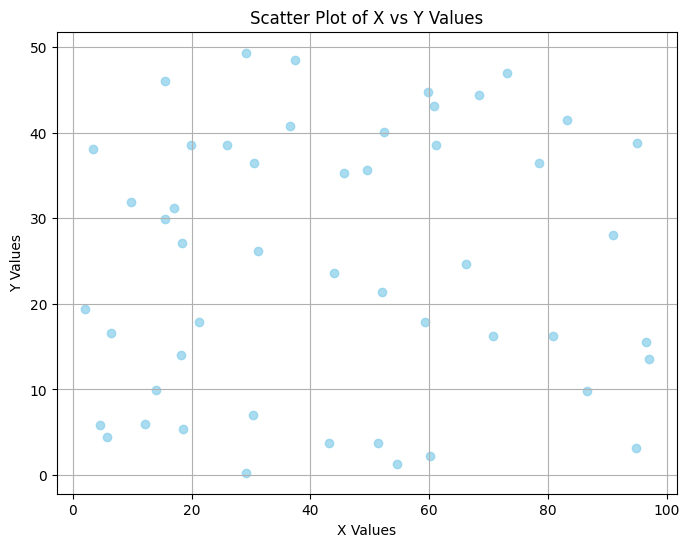

In [22]:
# Create a scatter plot
plt.figure(figsize=(8, 6)) # Set the figure size
plt.scatter(df_sample['x_values'], df_sample['y_values'], color='skyblue', alpha=0.7)

# Add title and labels
plt.title('Scatter Plot of X vs Y Values')
plt.xlabel('X Values')
plt.ylabel('Y Values')

# Add grid
plt.grid(True)

# Display the plot
plt.show()

### Line Plot

Create a line plot. For this, we need data that has a natural order, like time series data. Since we don't have time series data in our sample, we'll create a simple line plot based on sorted numerical data to demonstrate the concept.

**Reasoning**:
Sort the sample data by 'x_values' to create an ordered sequence, then create a line plot using `plt.plot()`, add title, labels, and display.

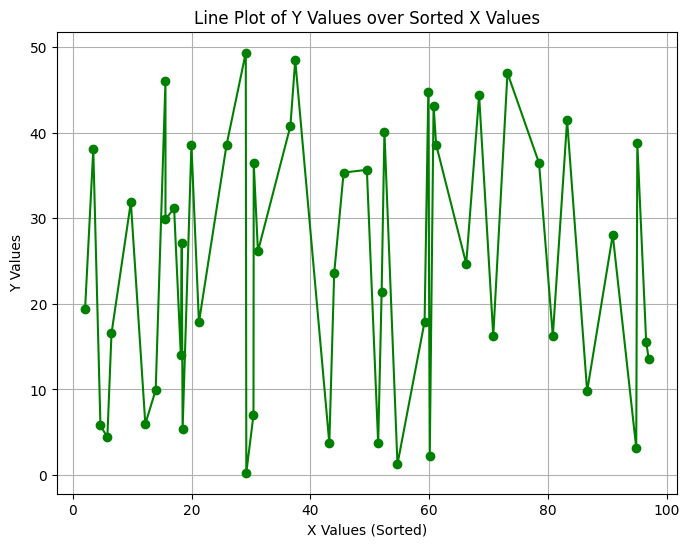

In [23]:
# Sort the sample data by 'x_values' for a meaningful line plot
df_sample_sorted = df_sample.sort_values(by='x_values')

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(df_sample_sorted['x_values'], df_sample_sorted['y_values'], marker='o', linestyle='-', color='green') # Add markers and style

# Add title and labels
plt.title('Line Plot of Y Values over Sorted X Values')
plt.xlabel('X Values (Sorted)')
plt.ylabel('Y Values')

# Add grid
plt.grid(True)

# Display the plot
plt.show()

### Histogram

Create a histogram to visualize the distribution of the `numerical_data`.

**Reasoning**:
Create a histogram using `plt.hist()`, add title, labels, and display.

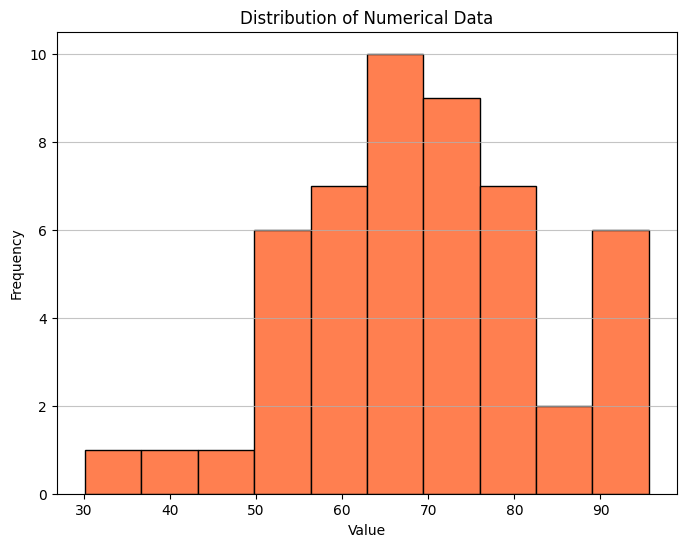

In [24]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df_sample['numerical_data'], bins=10, color='coral', edgecolor='black') # Specify number of bins and edge color

# Add title and labels
plt.title('Distribution of Numerical Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add grid
plt.grid(axis='y', alpha=0.75) # Add grid only on y-axis

# Display the plot
plt.show()

### Customization Examples

Demonstrate further customization options like changing colors, markers, line styles, adding legends, and annotations.

**Reasoning**:
Create a scatter plot with different colors and markers based on the 'categories' column, add a legend, and add an annotation to a specific point.

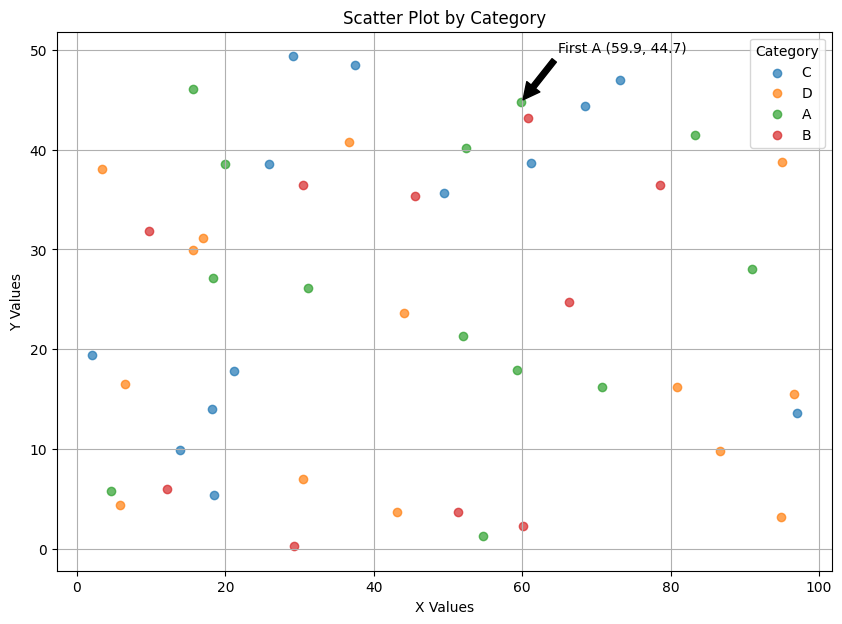

In [25]:
# Scatter plot with customization and legend
plt.figure(figsize=(10, 7))

# Plot data for each category
for category in df_sample['categories'].unique():
    subset = df_sample[df_sample['categories'] == category]
    plt.scatter(subset['x_values'], subset['y_values'], label=category, alpha=0.7)

# Add title and labels
plt.title('Scatter Plot by Category')
plt.xlabel('X Values')
plt.ylabel('Y Values')

# Add legend
plt.legend(title='Category')

# Add grid
plt.grid(True)

# Add an annotation to a specific point (e.g., the first point of category 'A')
first_A = df_sample[df_sample['categories'] == 'A'].iloc[0]
plt.annotate(f'First A ({first_A["x_values"]:.1f}, {first_A["y_values"]:.1f})',
             xy=(first_A['x_values'], first_A['y_values']),
             xytext=(first_A['x_values'] + 5, first_A['y_values'] + 5),
             arrowprops=dict(facecolor='black', shrink=0.05))


# Display the plot
plt.show()